In [1]:
# devtools::install_github('immunogenomics/presto', ref = 'glmm')

In [1]:
suppressPackageStartupMessages({
    source('../libs.R')
    source('../utils.R')    
    source('../utils_mapping.R')
})


# Load data

## Mouse

At this point in the analysis, assume that each tissue has: 

- lineage labeled
- counts 
- counts mapped to human genes
- UMAP (just in case) 


In [ ]:
gut_mm <- readRDS('/data/srlab/ik936/Roche/data/cache/gut_obj_mouse_stromal.rds')

gut_mm$meta_data <- gut_mm$meta_data %>% 
    subset(lineage %in% c('fibroblast', 'myofibroblast'))

gut_mm$exprs_raw <- gut_mm$exprs_raw[, gut_mm$meta_data$CellID]
gut_mm$exprs_raw_hs <- gut_mm$exprs_raw_hs[, gut_mm$meta_data$CellID]


In [3]:
head(gut_mm$meta_data)

CellID,RepID,Status,nGene,nUMI,percent_mito,LibraryID,scDblFinder.weighted,scDblFinder.ratio,scDblFinder.score,scDblFinder.class,weight,lineage
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
AAACCTGTCCTCAATT_DSS1,1,DSS,1002,2224,0.016187050,DSS1,0.0000000,0.00,0.0000000,singlet,1,fibroblast
AAACGGGAGAACAATC_DSS1,1,DSS,3145,10497,0.010288654,DSS1,0.2154967,0.20,0.2154967,singlet,1,myofibroblast
AAAGATGAGAAGGGTA_DSS1,1,DSS,2561,6889,0.007693424,DSS1,0.3996106,0.40,0.3996106,singlet,1,fibroblast
AAAGATGCAAAGTCAA_DSS1,1,DSS,1918,4783,0.008781100,DSS1,0.0000000,0.00,0.0000000,singlet,1,fibroblast
AAAGATGGTCGGCATC_DSS1,1,DSS,3004,11864,0.009187458,DSS1,0.3448305,0.35,0.3448305,singlet,1,fibroblast
AAAGATGGTTGGTTTG_DSS1,1,DSS,2368,6041,0.017050157,DSS1,0.1478429,0.15,0.1478429,singlet,1,fibroblast


In [4]:
syn_mm <- readRDS('/data/srlab2/ik936/Roche/data/cache/synovium_obj_mouse_stromal.rds')

syn_mm$meta_data <- syn_mm$meta_data %>% 
    dplyr::rename(CellID = cell_id, LibraryID = donor) %>% 
    subset(cell_type %in% c('sublining', 'intermediate', 'perivascular', 'lining')) %>% 
    dplyr::mutate(lineage = 'fibroblast') %>% 
    subset(status == 'case') 

syn_mm$exprs_raw <- syn_mm$exprs_raw[, syn_mm$meta_data$CellID]
syn_mm$exprs_raw_hs <- syn_mm$exprs_raw_hs[, syn_mm$meta_data$CellID]


In [5]:
syn_mm$meta_data %>% 
    with(table(label))


label
 ISO   KO   N3   WT 
2059 1617 1031  997 

In [6]:
unique(syn_mm$meta_data$lineage)

[1] "fibroblast"

In [7]:
head(syn_mm$meta_data)

,CellID,LibraryID,nUMI,nGene,percent_mito,label,status,cell_type,score_notch,label_status,disease,lineage
,<fct>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,AAACCTGTCGAACGGA_BRI062,BRI062,4976,1443,0.03758039,WT,case,sublining,39.09332,WT_case,Inflam,fibroblast
4,AAACGGGCACCTATCC_BRI062,BRI062,3169,1184,0.02776901,WT,case,sublining,26.65281,WT_case,Inflam,fibroblast
7,AAACGGGGTTAGGGTG_BRI062,BRI062,8171,2445,0.05629666,WT,case,lining,39.85879,WT_case,Inflam,fibroblast
8,AAACGGGTCTCGATGA_BRI062,BRI062,3750,1377,0.04880000,WT,case,intermediate,32.07274,WT_case,Inflam,fibroblast
10,AAAGATGAGCGTAGTG_BRI062,BRI062,8859,2500,0.03092900,WT,case,intermediate,44.42424,WT_case,Inflam,fibroblast
11,AAAGATGAGGAGTTTA_BRI062,BRI062,11002,3063,0.02354117,WT,case,lining,40.84746,WT_case,Inflam,fibroblast


In [8]:
lung_mm <- readRDS('/data/srlab2/ik936/Roche/data/cache/lung_obj_mouse_stromal.rds')

lung_mm$meta_data <- lung_mm$meta_data %>% 
    subset(lineage %in% c('fibroblast', 'myofibroblast')) %>% 
    subset(FACS == 'GFP+')

lung_mm$exprs_raw <- lung_mm$exprs_raw[, lung_mm$meta_data$CellID]
lung_mm$exprs_raw_hs <- lung_mm$exprs_raw_hs[, lung_mm$meta_data$CellID]

In [9]:
head(lung_mm$meta_data)

CellID,LibraryID,nGene,nUMI,percent_mito,title,Genotype,individual_identifier_ch1,FACS,Treatment,weight,lineage
<chr>,<chr>,<int>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
AAACCTGAGAGGTAGA_GSM3891612_Bleo1_GFPp,GSM3891612,2879,8615,0.03192107,Bleo1_GFPp,Col1a1-GFP reporter,Bleomycin1,GFP+,Bleomycin,1,fibroblast
AAACCTGAGCTGAAAT_GSM3891612_Bleo1_GFPp,GSM3891612,1140,2185,0.02242563,Bleo1_GFPp,Col1a1-GFP reporter,Bleomycin1,GFP+,Bleomycin,1,fibroblast
AAACCTGCAATGCCAT_GSM3891612_Bleo1_GFPp,GSM3891612,2109,5693,0.02037590,Bleo1_GFPp,Col1a1-GFP reporter,Bleomycin1,GFP+,Bleomycin,1,fibroblast
AAACCTGCAGGGTACA_GSM3891612_Bleo1_GFPp,GSM3891612,1962,4982,0.02729827,Bleo1_GFPp,Col1a1-GFP reporter,Bleomycin1,GFP+,Bleomycin,1,fibroblast
AAACCTGGTAAGTAGT_GSM3891612_Bleo1_GFPp,GSM3891612,2067,5032,0.04471383,Bleo1_GFPp,Col1a1-GFP reporter,Bleomycin1,GFP+,Bleomycin,1,fibroblast
AAACGGGAGATTACCC_GSM3891612_Bleo1_GFPp,GSM3891612,2057,5281,0.03048665,Bleo1_GFPp,Col1a1-GFP reporter,Bleomycin1,GFP+,Bleomycin,1,fibroblast


In [10]:
cia_mm <- readRDS('/data/srlab2/ik936/Roche/data/cache/cia2021_obj_mouse.rds')
cia_mm$meta_data <- cia_mm$meta_data %>% 
    subset(Name %in% c('Fibroblast'))

cia_mm$exprs_raw <- cia_mm$exprs_raw[, cia_mm$meta_data$CellID]
cia_mm$exprs_raw_hs <- cia_mm$exprs_raw_hs[, cia_mm$meta_data$CellID]


## mouse together (fibroblast only)

Note that only fibroblasts were mapped to the human tissues, so query objects only contain information on fibroblasts. 



In [15]:
pad_zeros <- function(A, genes_all) {
    genes_add_to_A <- setdiff(genes_all, rownames(A))
    add_to_A <- rsparsematrix(nrow = length(genes_add_to_A), ncol = ncol(A), nnz = 0)
    rownames(add_to_A) <- genes_add_to_A
    A <- Matrix::rbind2(A, add_to_A)
    A <- A[genes_all, ]
    return(A)
}


Mouse genes

In [16]:
exprs_list <- list(
    lung = lung_mm$exprs_raw, 
    synovium_sta = syn_mm$exprs_raw, 
    gut = gut_mm$exprs_raw,
    synovium_cia = cia_mm$exprs_raw
)
genes_all <- exprs_list %>% map(rownames) %>% reduce(union)
length(genes_all)

exprs_mouse <- exprs_list %>% 
    map(pad_zeros, genes_all) %>% 
    reduce(Matrix::cbind2)


[1] 32918

Human orthologs

In [17]:
exprs_list <- list(
    lung = lung_mm$exprs_raw_hs,
    synovium_sta = syn_mm$exprs_raw_hs,
    gut = gut_mm$exprs_raw_hs,
    synovium_cia = cia_mm$exprs_raw_hs
)
genes_all <- exprs_list %>% map(rownames) %>% reduce(union)
length(genes_all)

exprs_mouse_hs <- exprs_list %>% 
    map(pad_zeros, genes_all) %>% 
    reduce(Matrix::cbind2)


[1] 17788

In [18]:
meta_mouse <- list(
    Lung = dplyr::select(
        lung_mm$meta_data, 
        CellID, LibraryID, Status = Treatment, Lineage = lineage,
        nGene, nUMI, percent_mito
    ),
    Synovium_sta = dplyr::select(
        syn_mm$meta_data, 
        CellID, LibraryID, Status = label, Lineage = lineage,
        nGene, nUMI, percent_mito
    ),
    Gut = dplyr::select(
        gut_mm$meta_data, 
        CellID, LibraryID, Status, Lineage = lineage,
        nGene, nUMI, percent_mito
    ),
    Synovium_cia = dplyr::select(
        cia_mm$meta_data, 
        CellID, LibraryID, Status = Status, Lineage = Name,
        nGene, nUMI, percent_mito
    )
) %>%
    bind_rows(.id = 'Tissue') %>% 
    dplyr::mutate(Status_tissue = case_when(
        Status %in% c('hc', 'Untreated', 'nonInflam') ~ 'ctrl',
#         Status %in% c('dss', 'Bleomycin', 'Inflam') ~ 'case'
        TRUE ~ Status
    )) %>% 
    dplyr::mutate(Status = case_when(
#         Tissue == 'Synovium' ~ Status_tissue, 
        Status %in% c('HC', 'Untreated', 'nonInflam', 'N3', 'KO', 'CON', 'Control') ~ 'ctrl',
        Status %in% c('DSS', 'Bleomycin', 'Inflam', 'WT', 'ISO', 'CIA', 'Inflamed') ~ 'case'
    )) 

# %>% 
#     dplyr::mutate(Status = factor(Status, c('ctrl', 'case')))


In [19]:
all(meta_mouse$CellID == colnames(exprs_mouse))
all(meta_mouse$CellID == colnames(exprs_mouse_hs))

[1] TRUE

[1] TRUE

In [20]:
with(meta_mouse, table(Tissue, Status_tissue))
with(meta_mouse, table(Tissue, Status))


              Status_tissue
Tissue         Bleomycin Control  ctrl   DSS    HC Inflamed   ISO    KO    N3
  Gut                  0       0     0  3383  3596        0     0     0     0
  Lung              4418       0  5902     0     0        0     0     0     0
  Synovium_cia         0    4000     0     0     0    11965     0     0     0
  Synovium_sta         0       0     0     0     0        0  2059  1617  1031
              Status_tissue
Tissue            WT
  Gut              0
  Lung             0
  Synovium_cia     0
  Synovium_sta   997

              Status
Tissue          case  ctrl
  Gut           3383  3596
  Lung          4418  5902
  Synovium_cia 11965  4000
  Synovium_sta  3056  2648

## Cache

In [21]:
saveRDS(meta_mouse, '/data/srlab2/ik936/Roche/data/cache/meta_mouse_cache.rds')
saveRDS(exprs_mouse, '/data/srlab2/ik936/Roche/data/cache/exprs_mouse_cache.rds')
saveRDS(exprs_mouse_hs, '/data/srlab2/ik936/Roche/data/cache/exprs_mouse_hs_cache.rds')


In [22]:
ncol(exprs_mouse_hs)
ncol(exprs_mouse)
nrow(meta_mouse)

[1] 38968

[1] 38968

[1] 38968

# Joint analysis 

In [24]:
meta_mouse <- readRDS('/data/srlab2/ik936/Roche/data/cache/meta_mouse_cache.rds')
exprs_mouse_hs <- readRDS('/data/srlab2/ik936/Roche/data/cache/exprs_mouse_hs_cache.rds')
exprs_mouse <- readRDS('/data/srlab2/ik936/Roche/data/cache/exprs_mouse_cache.rds')


In [25]:
head(meta_mouse)

Tissue,CellID,LibraryID,Status,Lineage,nGene,nUMI,percent_mito,Status_tissue
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
Lung,AAACCTGAGAGGTAGA_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2879,8615,0.03192107,Bleomycin
Lung,AAACCTGAGCTGAAAT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,1140,2185,0.02242563,Bleomycin
Lung,AAACCTGCAATGCCAT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2109,5693,0.02037590,Bleomycin
Lung,AAACCTGCAGGGTACA_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,1962,4982,0.02729827,Bleomycin
Lung,AAACCTGGTAAGTAGT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2067,5032,0.04471383,Bleomycin
Lung,AAACGGGAGATTACCC_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2057,5281,0.03048665,Bleomycin


## Human ref object

In [26]:
obj_tissues <- readRDS('/data/srlab2/ik936/Roche/data/cache/obj_fibroblasts.rds')

In [27]:
ref_obj <- .buildReferenceFromHarmonyObj(
    obj_tissues$R, 
    t(obj_tissues$V), 
    obj_tissues$Z_corr, 
    obj_tissues$betas, 
#     cbind(obj_tissues$meta_data, obj_tissues$clusters_df), 
    obj_tissues$meta_data, 
    obj_tissues$vargenes_means_sds, 
    obj_tissues$loadings
)


Later, let's trim this down. We don't need to hold on to 7.5GB. 

In [28]:
pryr::object_size(ref_obj)
pryr::object_size(obj_tissues)


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp



163 MB

7.69 GB

## Map fibroblasts

In [29]:
head(meta_mouse, 3)

Tissue,CellID,LibraryID,Status,Lineage,nGene,nUMI,percent_mito,Status_tissue
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
Lung,AAACCTGAGAGGTAGA_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2879,8615,0.03192107,Bleomycin
Lung,AAACCTGAGCTGAAAT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,1140,2185,0.02242563,Bleomycin
Lung,AAACCTGCAATGCCAT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2109,5693,0.02037590,Bleomycin


In [30]:
dim(meta_mouse)
dim(exprs_mouse_hs)

[1] 38968     9

[1] 17788 38968

In [31]:
query_obj <- .mapQuery(
    exprs_mouse_hs,
    meta_mouse,
    ref_obj, 
#     vars = c('Tissue', 'LibraryID'), # query batch variables to harmonize over
    vars = c('LibraryID'), # query batch variables to harmonize over
#     vars = NULL, # query batch variables to harmonize over
    do_normalize = TRUE
)
    

## UMAP

In [32]:
uwot_obj <- uwot::load_uwot(obj_tissues$umap_after_fname)
query_obj$U <- umap_query <- uwot::umap_transform(t(singlecellmethods:::cosine_normalize_cpp(query_obj$Z, 2)), uwot_obj)


### Mouse types - where do they land? 

In [33]:
# head(query_obj$meta_data)
table(query_obj$meta_data$Status)


 case  ctrl 
22822 16146 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


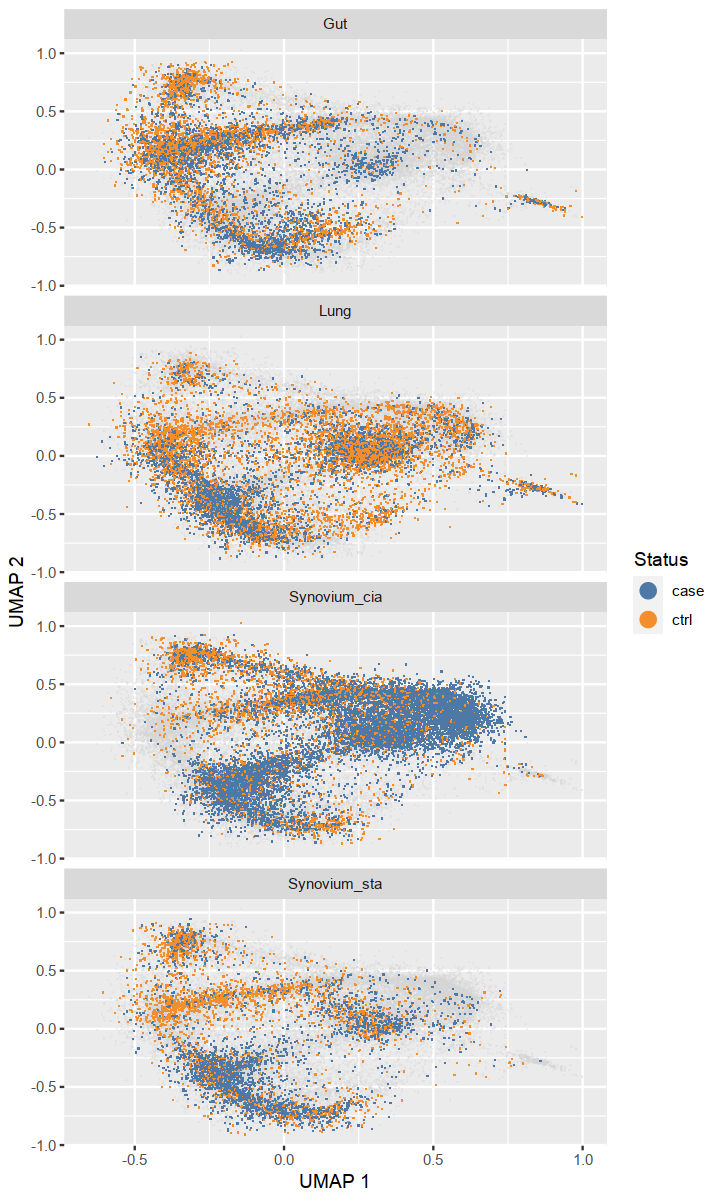

In [34]:
# fig.size(4, 10)
fig.size(10, 6)
do_scatter(
    query_obj$U, 
    query_obj$meta_data,
    'Status', quo(Tissue), nrow = 4,
    palette_use = tableau_color_pal('Tableau 10')(10), 
#     do_density = TRUE, 
    do_labels = FALSE, no_guides = FALSE, base_size = 20
)


### ref + query UMAP

In [37]:
## Join the ref and query datasets
m <- list(
    human = dplyr::select(obj_tissues$meta_data, LibraryID, Cluster),
    mouse = dplyr::select(query_obj$meta_data, LibraryID, Status)
) %>% 
    bind_rows(.id = 'species')

U <- rbind(obj_tissues$umap_after, query_obj$U)


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


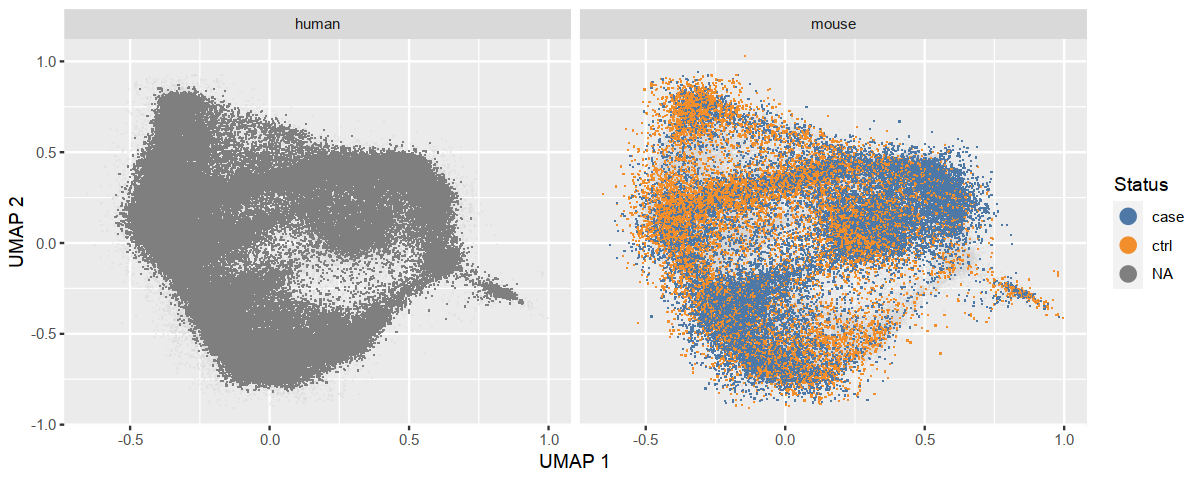

In [38]:
fig.size(4, 10)
do_scatter(
    U, m,
    'Status', quo(species), nrow = 1, 
    palette_use = tableau_color_pal('Tableau 10')(10), 
    do_labels = FALSE, no_guides = FALSE, base_size = 20
)


## KNN prediction

In [39]:
## the slowest step of the whole process (~3 min)
library(RANN)
system.time({
    knn <- nn2(t(obj_tissues$Z_cos), t(singlecellmethods:::cosine_normalize_cpp(query_obj$Z, 2)), k = 10, eps = 0)    
})


   user  system elapsed 
245.462   0.008 245.778 

In [40]:
library(modelr)
probs <- as.numeric(matrix(t(prop.table(exp(-knn$nn.dists / .1), 1)), ncol = 1))
## mm by hs matrix 
knn_dgc <- sparseMatrix(
    i = as.numeric(rep(seq_len(nrow(knn$nn.idx)), each = ncol(knn$nn.idx))), 
    j = as.numeric(matrix(t(knn$nn.idx), ncol = 1)), 
    x = probs ## distance to probability
)


In [41]:
library(modelr)

In [42]:
idx_min <- min(as.integer(knn$nn.idx))
idx_max <- max(as.integer(knn$nn.idx))

cluster_design <- as(as.matrix(model_matrix(obj_tissues$meta_data[1:idx_max, ], ~ 0 + Cluster)), 'dgCMatrix')
class_pred_probs <- knn_dgc %*% cluster_design
query_obj$meta_data$Cluster <- paste0('C', gsub('Cluster', '', colnames(cluster_design)))[apply(class_pred_probs, 1, which.max)]
# query_obj$meta_data$Cluster <- paste0('C', gsub('Cluster', '', colnames(cluster_design)))[apply(class_pred_probs, 1, which.max)]


In [43]:
# query_obj$meta_data$Cluster_prob <- apply(class_pred_probs, 1, max)


In [44]:
head(query_obj$meta_data)

Tissue,CellID,LibraryID,Status,Lineage,nGene,nUMI,percent_mito,Status_tissue,Cluster
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
Lung,AAACCTGAGAGGTAGA_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2879,8615,0.03192107,Bleomycin,C4
Lung,AAACCTGAGCTGAAAT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,1140,2185,0.02242563,Bleomycin,C7
Lung,AAACCTGCAATGCCAT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2109,5693,0.02037590,Bleomycin,C4
Lung,AAACCTGCAGGGTACA_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,1962,4982,0.02729827,Bleomycin,C7
Lung,AAACCTGGTAAGTAGT_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2067,5032,0.04471383,Bleomycin,C4
Lung,AAACGGGAGATTACCC_GSM3891612_Bleo1_GFPp,GSM3891612,case,fibroblast,2057,5281,0.03048665,Bleomycin,C3


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


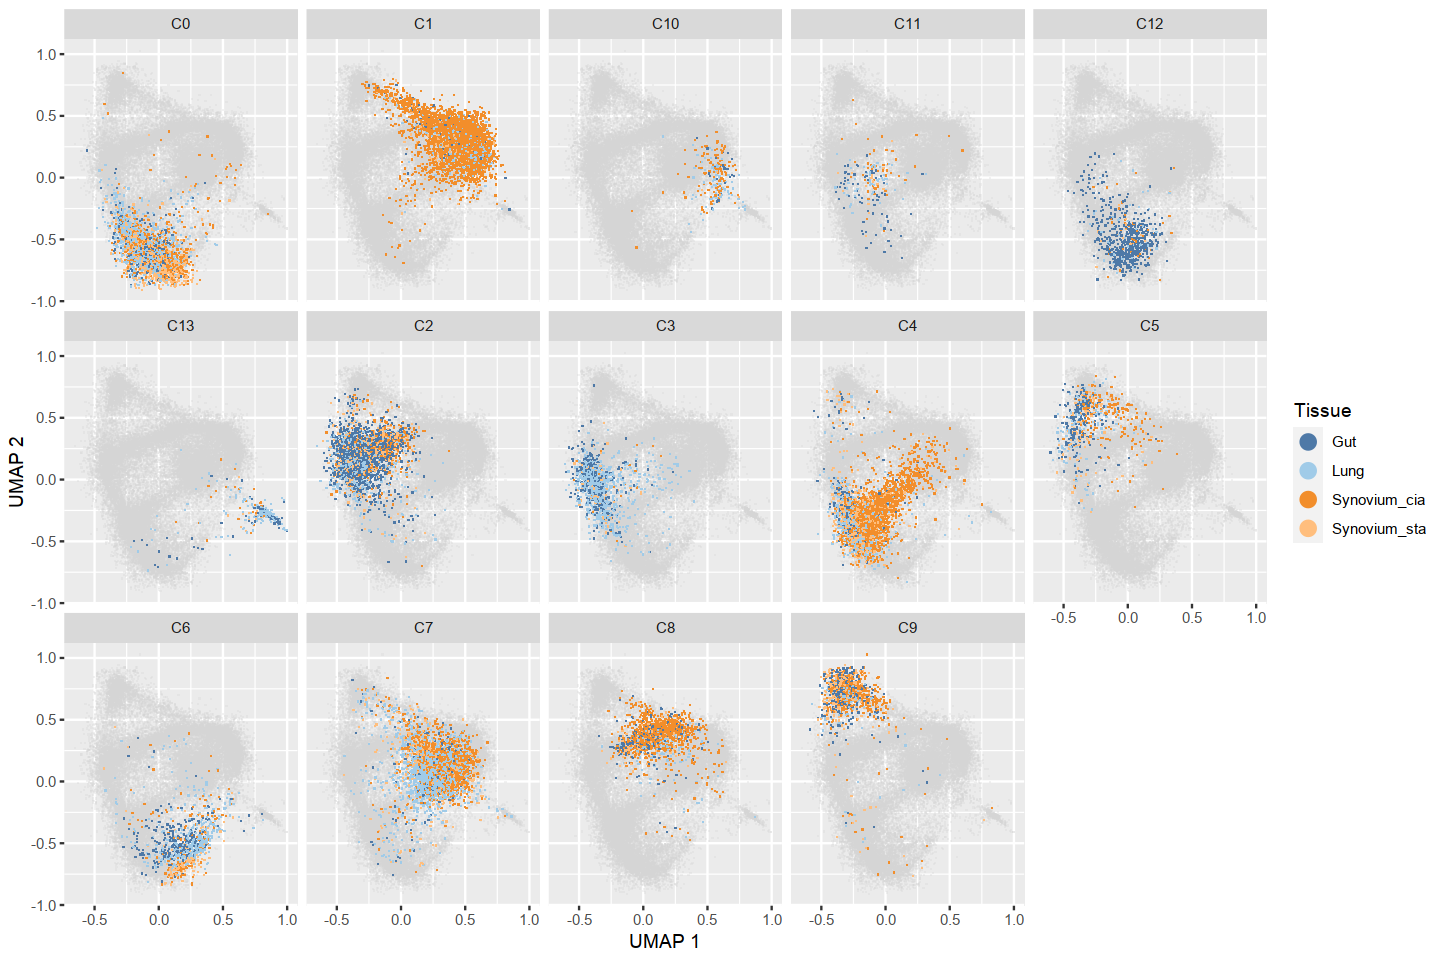

In [45]:
# fig.size(4, 10)
fig.size(8, 12)
do_scatter(
    query_obj$U, 
    query_obj$meta_data,
    'Tissue', quo(Cluster), nrow = 3,
    palette_use = tableau_color_pal('Tableau 20')(12), 
#     do_density = TRUE, 
    do_labels = FALSE, no_guides = FALSE, base_size = 20
)


In [46]:
# # fig.size(4, 10)
# fig.size(8, 8)
# do_scatter(
#     query_obj$U, 
#     query_obj$meta_data,
#     'Cluster', quo(Cluster), nrow = 3,
#     palette_use = tableau_color_pal('Tableau 20')(12), 
#     do_density = TRUE, do_points = FALSE, 
#     do_labels = FALSE, no_guides = FALSE, base_size = 20
# )


## Cache

In [72]:
query_obj$exprs_raw <- exprs_mouse
query_obj$exprs_raw_hs <- exprs_mouse_hs

In [73]:
saveRDS(query_obj, '/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')

# Presto 

In [6]:
obj <- readRDS('/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')

In [78]:
devtools::load_all('/data/srlab2/ik936/ReproducibleDGE/presto')

ℹ Loading presto



In [571]:
# meta_mouse <- readRDS('/data/srlab2/ik936/Roche/data/cache/meta_mouse_cache.rds')
# exprs_mouse_hs <- readRDS('/data/srlab2/ik936/Roche/data/cache/exprs_mouse_hs_cache.rds')

How consistent are mouse cluster genes with human cluster genes? 

We don't have many technical replicates but we can still learn the same model and look for consistency. 


In [8]:
library(presto)
library(lme4)
library(future)


## Human genes

In [128]:
# # set process limit to 10GB
# options(future.globals.maxSize = 1e9)

In [9]:
## Collapse Counts
pb <- presto::collapse_counts(
    obj$exprs_raw_hs,
    obj$meta_data, 
    c('Cluster', 'LibraryID', 'Tissue'),
    keep_n=TRUE, 
    how='sum'
) 
pb$meta_data$logUMI <- log(colSums(pb$counts_mat))

## need integers for GLMM
## this is only a problem for ortholog counts because of many to many mapping 
pb$counts_mat_int <- matrix(as.integer(pb$counts_mat), ncol = ncol(pb$counts_mat))
rownames(pb$counts_mat_int) <- rownames(pb$counts_mat)
colnames(pb$counts_mat_int) <- colnames(pb$counts_mat)

CAREFUL: get_norm makes very strong assumptions about data



In [12]:
genes_test <- rownames(pb$counts_mat)[which(rowSums(pb$counts_mat >= 3) >= 3)]
length(genes_test)


[1] 15160

In [13]:
## Fit Models
t2 <- system.time({
    suppressWarnings({
        obj$presto_hs <- presto.presto(
            formula = y~1+(1|Cluster)+(1|LibraryID/Cluster)+(1|Tissue/Cluster)+offset(logUMI), 
            design = pb$meta_data, 
            response = pb$counts_mat, 
            size_varname = 'logUMI',
            features = genes_test,
            ncore = 20,
            nsim = 1e3,
            effects_cov = c('Cluster', 'Cluster:Tissue'),
            min_sigma = .5,
            verbose = 1
        ) 
    })
})


CAUTION: if using GLMM, make sure your counts are integers!

Set up models

Learn the models

Aggregate the results

Cleap up names

Joining, by = "grpvar_orig"

Compute gene means



In [14]:
contrasts_mat <- make_contrast.presto(obj$presto_hs, 'Cluster', 'Tissue')
obj$effects_hs <- contrasts.presto(obj$presto_hs, contrasts_mat, one_tailed = FALSE) %>% 
    tidyr::separate(contrast, c('Cluster', 'Tissue'), sep = '\\|', remove = FALSE) %>% 
    arrange(pvalue)


Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 14 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14].”


In [15]:
head(obj$effects_hs)

contrast,Cluster,Tissue,feature,beta,sigma,zscore,pvalue
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
C13|Gut,C13,Gut,CLEC3B,-4.401497,0.4432056,-9.931051,3.050235e-23
C11|Synovium_sta,C11,Synovium_sta,ISG15,3.662109,0.3993323,9.170581,4.704763e-20
C11|Synovium_sta,C11,Synovium_sta,IFIT1B,4.008293,0.4386625,9.137534,6.389277e-20
C13|Gut,C13,Gut,PDGFRA,-3.594546,0.4053479,-8.867806,7.460116e-19
C13|Gut,C13,Gut,C3,-3.592204,0.4126503,-8.705204,3.170053e-18
C11|Synovium_sta,C11,Synovium_sta,IFIT3,3.964960,0.4755426,8.337758,7.571217e-17


In [16]:
## ~__ minutes 
t2[['elapsed']] / 60

[1] 50.89027

## Mouse genes 

In [17]:
## Collapse Counts
pb <- presto::collapse_counts(
    obj$exprs_raw,
    obj$meta_data, 
    c('Cluster', 'LibraryID', 'Tissue'),
    keep_n=TRUE, 
    how='sum'
) 
pb$meta_data$logUMI <- log(colSums(pb$counts_mat))


## need integers for GLMM
## not needed for mouse genes, but let's do it anyway to make sure things are really integers
pb$counts_mat_int <- matrix(as.integer(pb$counts_mat), ncol = ncol(pb$counts_mat))
rownames(pb$counts_mat_int) <- rownames(pb$counts_mat)
colnames(pb$counts_mat_int) <- colnames(pb$counts_mat)


CAREFUL: get_norm makes very strong assumptions about data



In [18]:
genes_test <- rownames(pb$counts_mat)[which(rowSums(pb$counts_mat >= 3) >= 5)]
length(genes_test)


[1] 17264

In [ ]:
## Fit Models
t2 <- system.time({
    suppressWarnings({
        obj$presto_mm <- presto.presto(
            formula = y~1+(1|Cluster)+(1|LibraryID/Cluster)+(1|Tissue/Cluster)+offset(logUMI), 
            design = pb$meta_data, 
            response = pb$counts_mat, 
            size_varname = 'logUMI',
            features = genes_test, 
            ncore = 20,
            nsim = 1e3,
            effects_cov = c('Cluster', 'Cluster:Tissue'),
            min_sigma = .5,
            verbose = 1
        ) 
    })
})


In [ ]:
contrasts_mat <- make_contrast.presto(obj$presto_mm, 'Cluster', 'Tissue')
obj$effects_mm <- contrasts.presto(obj$presto_mm, contrasts_mat, one_tailed = FALSE) %>% 
    tidyr::separate(contrast, c('Cluster', 'Tissue'), sep = '\\|', remove = FALSE) %>% 
    arrange(pvalue)


In [ ]:
head(obj$effects_mm)

In [ ]:
## ~__ minutes 
t2[['elapsed']] / 60

## Cache

In [ ]:
# obj$counts_mm <- exprs_mouse
# obj$counts_hs <- exprs_mouse_hs


In [20]:
saveRDS(obj, '/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')

# Proportions

In [49]:
obj <- readRDS('/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')

## Barplot

### By donor

Joining, by = "LibraryID"



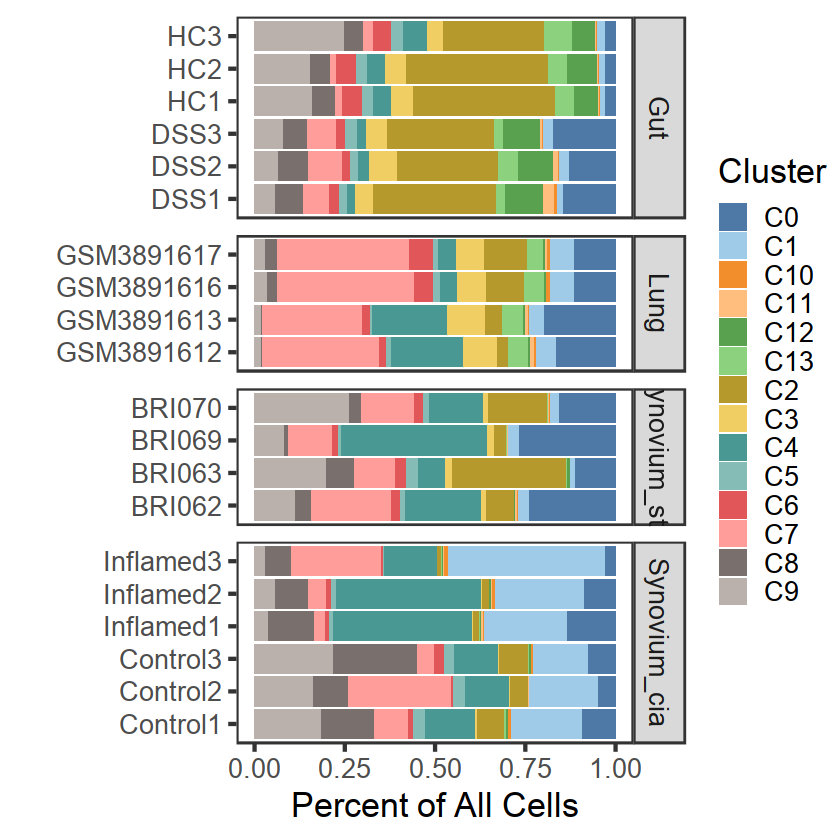

In [50]:
fig.size(7, 7)
obj$meta_data %>% 
    with(prop.table(table(LibraryID, Cluster), 1)) %>% 
    data.table() %>% 
    dplyr::inner_join(
        unique(dplyr::select(obj$meta_data, LibraryID, Tissue, Status))
    ) %>% 
    dplyr::mutate(Tissue = factor(Tissue, c('Gut', 'Lung', 'Synovium_sta', 'Synovium_cia'))) %>% 
    ggplot(aes(LibraryID, 100 * N, fill = Cluster)) + 
        geom_bar(stat = 'identity', position = position_fill()) + 
        scale_fill_tableau('Tableau 20') + 
        theme_test(base_size = 20) + 
        coord_flip() + 
        facet_grid(Tissue~., space = 'free', scale = 'free') + 
        labs(y = 'Percent of All Cells', x = '') + 
        NULL



### By cluster

In [51]:
obj$meta_data %>% with(table(Tissue))

Tissue
         Gut         Lung Synovium_cia Synovium_sta 
        6979        10320        15965         5704 

Joining, by = "Tissue"



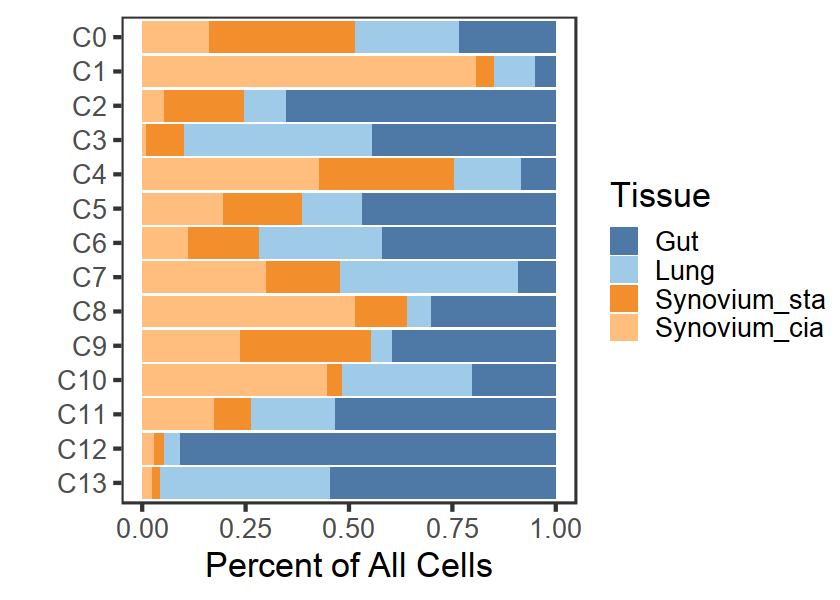

In [52]:
fig.size(5, 7)
obj$meta_data %>% 
    with(table(Tissue, Cluster)) %>% 
    prop.table(1) %>% ## make tissues equal
    prop.table(2) %>% ## Cluster is demoninator 
    data.table() %>% 
    dplyr::inner_join(
        unique(dplyr::select(obj$meta_data, LibraryID, Tissue, Status))
    ) %>% 
    dplyr::mutate(Tissue = factor(Tissue, c('Gut', 'Lung', 'Synovium_sta', 'Synovium_cia'))) %>% 
    dplyr::mutate(Cluster = factor(Cluster, rev(paste0('C', 0:13)))) %>% 
    ggplot(aes(Cluster, 100 * N, fill = Tissue)) + 
        geom_bar(stat = 'identity', position = position_fill()) + 
        scale_fill_tableau('Tableau 20') + 
        theme_test(base_size = 20) + 
        coord_flip() + 
        labs(y = 'Percent of All Cells', x = '') + 
        NULL



### By donor with Status

In [53]:
data.table(obj$meta_data)[Tissue == 'Synovium_cia' & Cluster == 'C11', .N, by = .(LibraryID)]

LibraryID,N
<chr>,<int>
Control2,1
Control3,4
Inflamed1,7
Inflamed2,10
Inflamed3,30


Joining, by = "LibraryID"

Warning message in tapply(X = X, INDEX = x, FUN = FUN, ...):
“NAs introduced by coercion”
Warning message in tapply(X = X, INDEX = x, FUN = FUN, ...):
“NAs introduced by coercion”


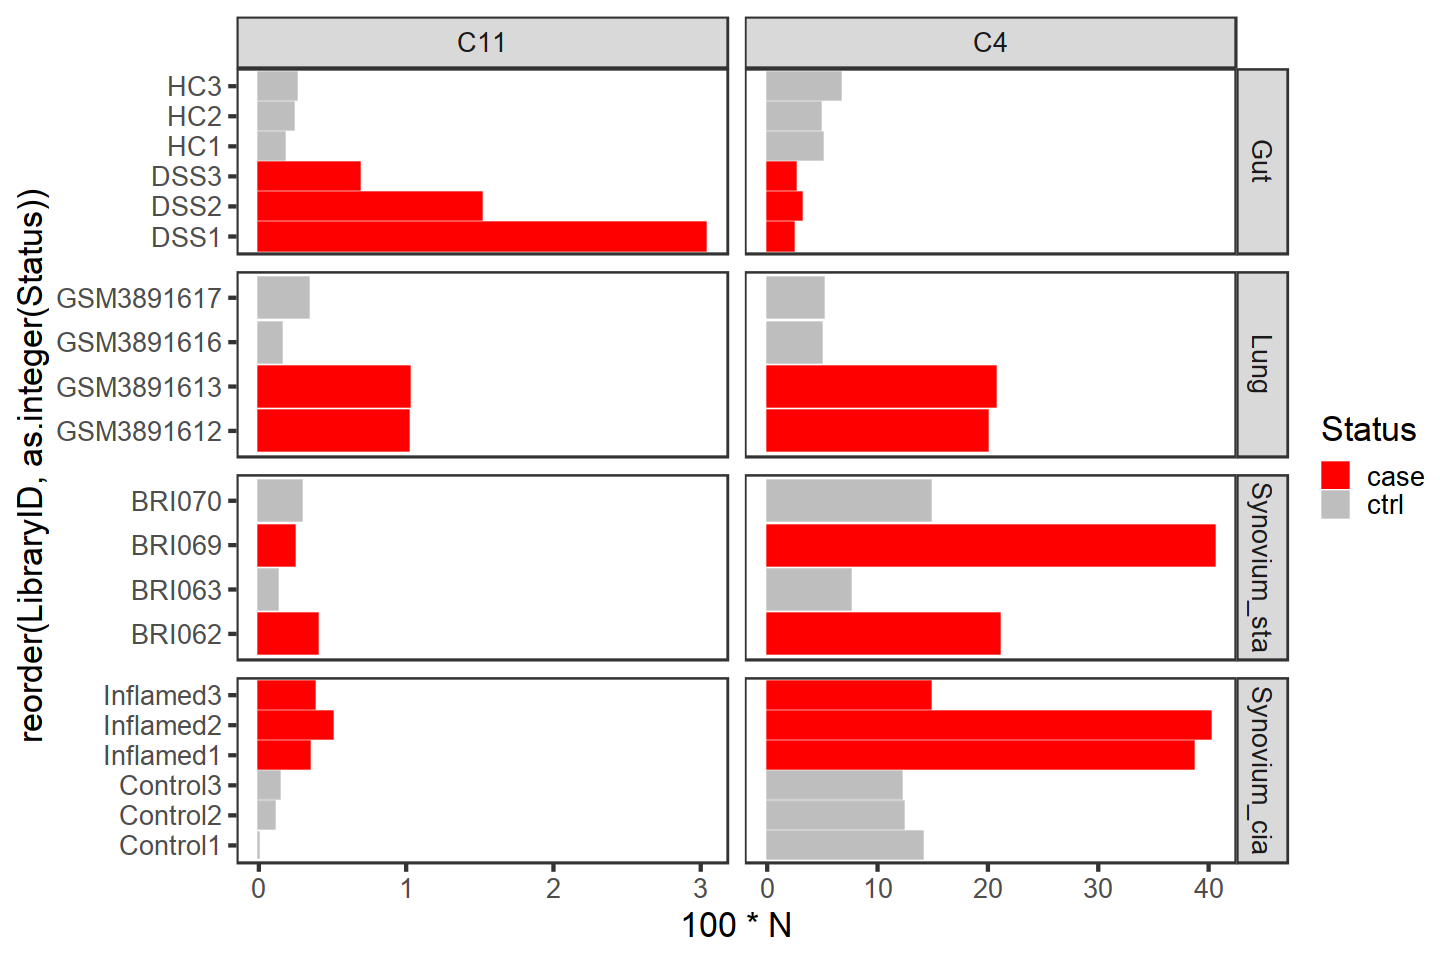

In [54]:
fig.size(8, 12)
obj$meta_data %>% 
    with(table(LibraryID, Cluster)) %>% 
    prop.table(1) %>% 
    data.table() %>% 
    dplyr::inner_join(
        unique(dplyr::select(obj$meta_data, LibraryID, Tissue, Status))
    ) %>% 
    dplyr::mutate(Tissue = factor(Tissue, c('Gut', 'Lung', 'Synovium_sta', 'Synovium_cia'))) %>% 
    dplyr::mutate(Cluster = factor(Cluster, rev(paste0('C', 0:13)))) %>% 
    subset(Cluster %in% c('C11', 'C4')) %>% 
    ggplot(aes(reorder(LibraryID, as.integer(Status)), 100 * N, fill = Status, color = Status)) + 
        geom_bar(stat = 'identity') + 
        facet_grid(Tissue~Cluster, scales = 'free') + 
        theme_test(base_size = 20) + 
        coord_flip() + 
        scale_fill_manual(values = c(case = 'red', ctrl = 'grey')) + 
        scale_color_manual(values = c(case = 'red', ctrl = 'grey')) + 
        NULL


## MASC

In [92]:
# obj <- readRDS('/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')

In [55]:
future::plan(multicore) 
options(future.globals.maxSize=5e8) ## 500MB for futures

## define this outside of obj so futures doesn't copy obj each time 
data_df <- obj$meta_data %>% 
    dplyr::mutate(
        Cluster = as.character(Cluster),
        Tissue = as.character(Tissue),
        Status = factor(Status, c('ctrl', 'case'))
    ) %>% 
    dplyr::mutate(
        percent_mito = scale(percent_mito)
    ) %>% 
    identity()


In [56]:
t_masc <- system.time({
    obj$masc <- expand.grid(
        cluster_test = unique(data_df$Cluster), 
        tissue_test = unique(data_df$Tissue)
    ) %>% 
    future_pmap(function(cluster_test, tissue_test, ...) {
        message(paste(cluster_test, tissue_test))
        data_use <- data_df %>% 
            dplyr::mutate(Response = case_when(
                Cluster == cluster_test ~ 1L,
                TRUE ~ 0L
            )) %>% 
            subset(Tissue == tissue_test)

            tryCatch({
                model <- glmer(
                    formula = Response ~ 1 + Status + (percent_mito||LibraryID), 
                    data = data_use, 
                    family = 'binomial'
                )
                tibble(
                    Cluster = cluster_test,
                    Tissue = tissue_test, 
                    Ncells = sum(data_use$Response == 1L),
                    beta = fixef(model)[['Statuscase']] / log(2),
                    sigma = sqrt(vcov(model)['Statuscase', 'Statuscase']) / log(2)
                ) %>% 
                dplyr::mutate(zscore = beta / sigma) %>% 
                dplyr::mutate(pvalue = 2 * pnorm(-abs(zscore))) %>% 
                return()

            }, error = function(e) {
                print(e)
                tibble(
                    Cluster = cluster_test,
                    Tissue = tissue_test, 
                    Ncells = sum(data_use$Response == 1L),
                    beta = NA,
                    sigma = NA
                ) %>% 
                return()

            })

    }) %>% bind_rows()
})

C4 Lung

boundary (singular) fit: see ?isSingular

C7 Lung

C3 Lung

boundary (singular) fit: see ?isSingular

C0 Lung

C1 Lung

C5 Lung

boundary (singular) fit: see ?isSingular

C13 Lung

boundary (singular) fit: see ?isSingular

C2 Lung

C9 Lung

C6 Lung

C11 Lung

boundary (singular) fit: see ?isSingular

C10 Lung

boundary (singular) fit: see ?isSingular

C8 Lung

boundary (singular) fit: see ?isSingular

C12 Lung

boundary (singular) fit: see ?isSingular

C4 Synovium_sta

C7 Synovium_sta

C3 Synovium_sta

boundary (singular) fit: see ?isSingular

C0 Synovium_sta

C1 Synovium_sta

boundary (singular) fit: see ?isSingular

C5 Synovium_sta

boundary (singular) fit: see ?isSingular

C13 Synovium_sta

boundary (singular) fit: see ?isSingular

C2 Synovium_sta

C9 Synovium_sta

C6 Synovium_sta

boundary (singular) fit: see ?isSingular

C11 Synovium_sta

boundary (singular) fit: see ?isSingular

C10 Synovium_sta

boundary (singular) fit: see ?isSingular

C8 Synovium_sta

C12 Synovium_sta

In [60]:
obj$masc$fdr <- p.adjust(obj$masc$pvalue, 'BH')

In [61]:
obj$masc %>% 
    subset(Tissue == 'Synovium_cia') %>% 
    arrange(-zscore)

Cluster,Tissue,Ncells,beta,sigma,zscore,pvalue,fdr
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,Synovium_cia,5062,1.2151673,0.2890161,4.2044977,2.616626e-05,9.158191e-05
C4,Synovium_cia,3264,1.3977112,0.5021847,2.7832611,5.381548e-03,1.205467e-02
C11,Synovium_cia,52,1.3404549,0.8405000,1.5948303,1.107502e-01,1.824121e-01
C10,Synovium_cia,125,0.6093959,0.5562432,1.0955566,2.732729e-01,3.923918e-01
C12,Synovium_cia,44,0.3893208,0.7531242,0.5169411,6.051973e-01,6.916540e-01
C0,Synovium_cia,988,0.1846406,0.6228547,0.2964425,7.668922e-01,8.258839e-01
C7,Synovium_cia,2565,-0.4333324,1.0765550,-0.4025177,6.873031e-01,7.546858e-01
C3,Synovium_cia,22,-0.8441147,1.0462981,-0.8067631,4.198030e-01,5.173798e-01
C6,Synovium_cia,169,-0.7606381,0.7712361,-0.9862585,3.240063e-01,4.320084e-01


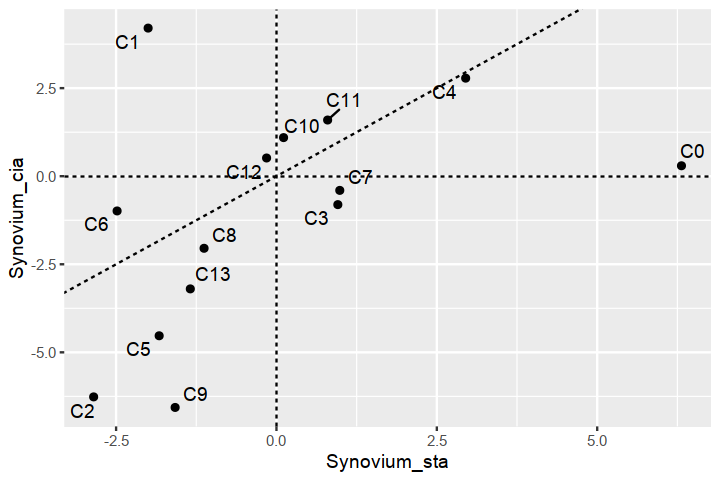

In [62]:
fig.size(4, 6)
obj$masc %>% 
    subset(grepl('Synovium', Tissue)) %>% 
    subset(abs(beta) < 10) %>% 
    dplyr::select(Tissue, SCORE=zscore, Cluster) %>% 
    tidyr::spread(Tissue, SCORE) %>% 
    ggplot(aes(Synovium_sta, Synovium_cia)) + 
        geom_point() + 
        geom_abline(linetype = 2) + 
        geom_hline(yintercept = 0, linetype = 2) + 
        geom_vline(xintercept = 0, linetype = 2) + 
        geom_text_repel(aes(label = Cluster)) 
#         xlim(-5, 5) + ylim(-5, 5)

In [63]:
obj$masc %>% 
    subset(fdr < .2 & beta > 0) %>% 
    split(.$Tissue) %>%
    map(arrange, pvalue)


Cluster,Tissue,Ncells,beta,sigma,zscore,pvalue,fdr
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C4,Lung,1191,2.3079928,0.1138388,20.274218,2.172163e-91,1.216412e-89
C0,Lung,1489,0.7660329,0.1264689,6.057085,1.386104e-09,8.624644e-09
C11,Lung,59,2.3531080,0.4790066,4.912475,8.993367e-07,3.874066e-06
C3,Lung,903,0.3510268,0.1122379,3.127524,1.762856e-03,5.195785e-03
C13,Lung,554,0.2629813,0.1542970,1.704384,8.830942e-02,1.536198e-01
Cluster,Tissue,Ncells,beta,sigma,zscore,pvalue,fdr
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C0,Synovium_sta,1146,1.385327,0.2194151,6.313727,2.723948e-10,2.179159e-09
C4,Synovium_sta,1319,1.861127,0.6310076,2.949453,3.183366e-03,8.103114e-03


# Cache

In [89]:
# obj$masc <- list()
# obj$masc$all <- res
# obj$masc$cluster_tissue <- res_tidy

In [64]:
saveRDS(obj, '/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')


In [2]:
obj <- readRDS('/data/srlab2/ik936/Roche/data/cache/mouse_query_joint.rds')


To make it more memory efficient: 

In [4]:
dname <- '/data/srlab2/ik936/Roche/data/cache/mouse_query_joint/'
if (!dir.exists(dname)) dir.create(dname)
obj %>% imap(function(.obj, .name) {
    message(.name)
    saveRDS(.obj, paste0(dname, .name, '.rds'))
    return(.name)
})


Z

Zq_pca

R

Xq

meta_data

U

masc

exprs_raw

exprs_raw_hs

presto_hs

effects_hs



$Z
[1] "Z"

$Zq_pca
[1] "Zq_pca"

$R
[1] "R"

$Xq
[1] "Xq"

$meta_data
[1] "meta_data"

$U
[1] "U"

$masc
[1] "masc"

$exprs_raw
[1] "exprs_raw"

$exprs_raw_hs
[1] "exprs_raw_hs"

$presto_hs
[1] "presto_hs"

$effects_hs
[1] "effects_hs"